<a href="https://colab.research.google.com/github/bhanu519/projects/blob/main/AQI_prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
air_quality_index=pd.read_csv('/content/uAirQualityUCI.csv',sep=',')

In [4]:
air_quality_index.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN,NaN,NaN
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN,NaN,NaN
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.9,54.0,0.7502,NaN,NaN,NaN,NaN
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN,NaN,NaN
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN,NaN,NaN


In [5]:
air_quality_index.tail()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#removing last empty rows
df=air_quality_index.head(9357)

In [8]:
df.tail()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
9352,3.1,1314.0,-200.0,13.5,1101.0,472.0,538.0,190.0,1374.0,1728.0,21.9,29.2,0.7568,NaN,NaN,NaN,NaN
9353,2.4,1162.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,NaN,NaN,NaN,NaN
9354,2.4,1142.0,-200.0,12.4,1062.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,NaN,NaN,NaN,NaN
9355,2.1,1002.0,-200.0,9.5,960.0,234.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,NaN,NaN,NaN,NaN
9356,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1128.0,816.0,28.5,13.1,0.5028,NaN,NaN,NaN,NaN


In [9]:
#removing last 2 columns
df=df.iloc[:,:-4]

In [10]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [11]:
df.shape

(9357, 13)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 950.4 KB


In [13]:
df.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [14]:
#here actual missing value is not NaN.it is -200
df.isin([-200]).sum()

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [15]:
df=df.replace(to_replace=-200,value=np.NaN)

In [16]:
df.isnull().sum()

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [17]:
df.tail()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,3.1,1314.0,NaN,13.5,1101.0,472.0,538.0,190.0,1374.0,1728.0,21.9,29.2,0.7568
9353,2.4,1162.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,NaN,12.4,1062.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1002.0,NaN,9.5,960.0,234.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,2.2,1071.0,NaN,11.9,1047.0,265.0,654.0,168.0,1128.0,816.0,28.5,13.1,0.5028


<Axes: >

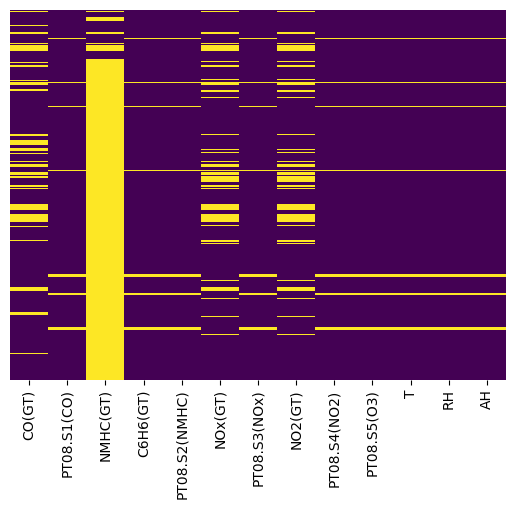

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
df.mean()

CO(GT)              2.152750
PT08.S1(CO)      1099.713158
NMHC(GT)          218.811816
C6H6(GT)           10.083105
PT08.S2(NMHC)     939.030252
NOx(GT)           246.882871
PT08.S3(NOx)      835.370370
NO2(GT)           113.075437
PT08.S4(NO2)     1456.142142
PT08.S5(O3)      1022.782894
T                  18.316316
RH                 49.232633
AH                  1.025530
dtype: float64

In [20]:
df=df.fillna(df.mean())

In [21]:
df.tail()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,3.1,1314.0,218.811816,13.5,1101.0,472.0,538.0,190.0,1374.0,1728.0,21.9,29.2,0.7568
9353,2.4,1162.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,218.811816,12.4,1062.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1002.0,218.811816,9.5,960.0,234.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,2.2,1071.0,218.811816,11.9,1047.0,265.0,654.0,168.0,1128.0,816.0,28.5,13.1,0.5028


In [22]:
df.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

<Axes: >

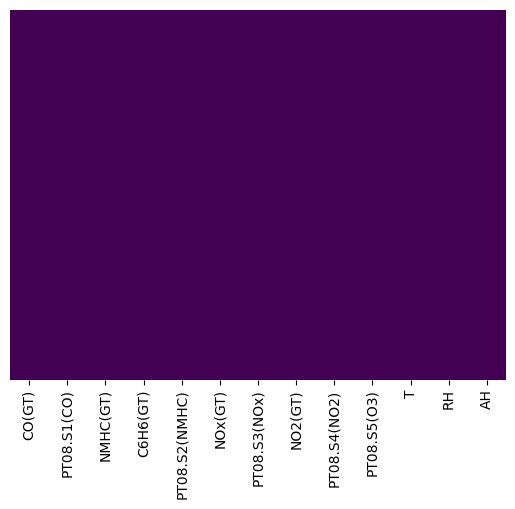

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

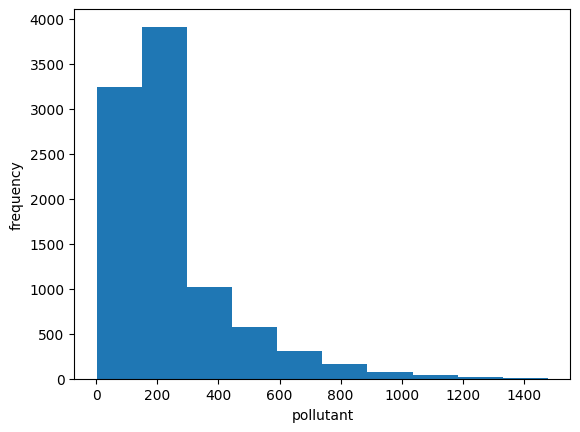

In [24]:
plt.hist(df['NOx(GT)'])
plt.xlabel('pollutant')
plt.ylabel('frequency')
plt.show()

In [25]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [26]:
x.shape

(9357, 12)

In [27]:
y.shape

(9357,)

In [28]:

from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=98)



In [29]:
X_train.shape

(6549, 12)

In [30]:
y_train.shape

(6549,)

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()


In [32]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [33]:
y_pred=rf.predict(X_test)

In [34]:
y_pred

array([0.772423  , 0.936519  , 0.788325  , ..., 0.721795  , 1.044823  ,
       1.02553027])

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.00022320932717903791

In [37]:
from sklearn.metrics import accuracy_score
rf.score(X_test,y_test)


0.9985310482485249